<a href="https://colab.research.google.com/github/arimohy/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [2]:
#Ingreso total por cada tienda

facturacion_por_tienda={
    'Tienda':['Tienda1','Tienda2','Tienda3','Tienda4'],
    'Ingreso Total':[tienda['Precio'].sum(), tienda2['Precio'].sum(),tienda3['Precio'].sum() ,tienda4['Precio'].sum()]
}

df_facturacion_por_tienda = pd.DataFrame(facturacion_por_tienda)

display(df_facturacion_por_tienda)


Tienda  Ingreso Total
0  Tienda1   1.150880e+09
1  Tienda2   1.116344e+09
2  Tienda3   1.098020e+09
3  Tienda4   1.038376e+09

# 2. Ventas por categor√≠a

In [3]:
def contar_ventas_por_categoria(df, nombre_tienda):
    resultado = df.groupby('Categor√≠a del Producto').size().reset_index(name='CV_' + str(nombre_tienda))
    return resultado

ventas_tienda1 = contar_ventas_por_categoria(tienda, 'Tienda1')
ventas_tienda2 = contar_ventas_por_categoria(tienda2, 'Tienda2')
ventas_tienda3 = contar_ventas_por_categoria(tienda3, 'Tienda3')
ventas_tienda4 = contar_ventas_por_categoria(tienda4, 'Tienda4')


ventas_merged = ventas_tienda1.merge(ventas_tienda2, on='Categor√≠a del Producto', how='outer') \
                               .merge(ventas_tienda3, on='Categor√≠a del Producto', how='outer') \
                               .merge(ventas_tienda4, on='Categor√≠a del Producto', how='outer')


display(ventas_merged)


Categor√≠a del Producto  CV_Tienda1  CV_Tienda2  CV_Tienda3  CV_Tienda4
0  Art√≠culos para el hogar         171         181         177         201
1     Deportes y diversi√≥n         284         275         277         277
2        Electrodom√©sticos         312         305         278         254
3             Electr√≥nicos         448         422         451         451
4   Instrumentos musicales         182         224         177         170
5                 Juguetes         324         313         315         338
6                   Libros         173         197         185         187
7                  Muebles         465         442         499         480

In [4]:
for t in ventas_merged.columns[1:]:
    top_categorias = ventas_merged[['Categor√≠a del Producto', t]].sort_values(by=t, ascending=False).head(3)
    print(f"\nTop 3 categor√≠as en {t}:")
    print(top_categorias.to_string(index=False))



Top 3 categor√≠as en CV_Tienda1:
Categor√≠a del Producto  CV_Tienda1
               Muebles         465
          Electr√≥nicos         448
              Juguetes         324

Top 3 categor√≠as en CV_Tienda2:
Categor√≠a del Producto  CV_Tienda2
               Muebles         442
          Electr√≥nicos         422
              Juguetes         313

Top 3 categor√≠as en CV_Tienda3:
Categor√≠a del Producto  CV_Tienda3
               Muebles         499
          Electr√≥nicos         451
              Juguetes         315

Top 3 categor√≠as en CV_Tienda4:
Categor√≠a del Producto  CV_Tienda4
               Muebles         480
          Electr√≥nicos         451
              Juguetes         338


# 3. Calificaci√≥n promedio de la tienda


In [5]:
#calificacion tienda

calificacion_por_tienda={
    'Tienda':['Tienda1','Tienda2','Tienda3','Tienda4'],
    'Calificacion Promedio':[tienda['Calificaci√≥n'].mean(), tienda2['Calificaci√≥n'].mean(),tienda3['Calificaci√≥n'].mean() ,tienda4['Calificaci√≥n'].mean()]
}

df_calificacion_por_tienda = pd.DataFrame(calificacion_por_tienda)

display(df_calificacion_por_tienda)

Tienda  Calificacion Promedio
0  Tienda1               3.976685
1  Tienda2               4.037304
2  Tienda3               4.048326
3  Tienda4               3.995759

# 4. Productos m√°s y menos vendidos

In [6]:
def contar_productos(df, nombre_tienda):
    resultado = df.groupby('Producto').size().reset_index(name='#prod_' + str(nombre_tienda))
    return resultado

ventas_tienda1 = contar_productos(tienda, 'T1')
ventas_tienda2 = contar_productos(tienda2, 'T2')
ventas_tienda3 = contar_productos(tienda3, 'T3')
ventas_tienda4 = contar_productos(tienda4, 'T4')


productos_merged = ventas_tienda1.merge(ventas_tienda2, on='Producto', how='outer') \
                               .merge(ventas_tienda3, on='Producto', how='outer') \
                               .merge(ventas_tienda4, on='Producto', how='outer')


display(productos_merged)


Producto  #prod_T1  #prod_T2  #prod_T3  #prod_T4
0             Ajedrez de madera        49        45        47        39
1                       Armario        60        54        49        34
2             Asistente virtual        40        38        39        50
3                   Auriculares        50        37        43        44
4     Auriculares con micr√≥fono        33        44        39        42
5           Bal√≥n de baloncesto        55        42        50        50
6             Bal√≥n de voleibol        42        46        48        48
7                       Bater√≠a        53        61        41        48
8                     Bicicleta        54        45        52        45
9       Bloques de construcci√≥n        56        54        35        54
10                     Cama box        44        47        46        62
11                    Cama king        44        45        56        56
12    Carrito de control remoto        52        47        52        55
13                 Celular ABXY        33        41        44        39
14  Ciencia de datos con Python        39        43        46        38
15                   Cuberter√≠a        52        39        39        59
16              Cubo m√°gico 8x8        44        45        44        47
17           Cuerda para saltar        40        50        53        43
18      Dashboards con Power BI        42        43        40        56
19               Dinosaurio Rex        40        42        46        47
20                       Estufa        45        42        53        47
21            Guitarra ac√∫stica        46        58        47        37
22           Guitarra el√©ctrica        47        47        38        33
23                    Impresora        54        34        50        50
24    Iniciando en programaci√≥n        41        65        46        43
25                    Iphone 15        49        55        46        48
26                Juego de mesa        43        32        52        48
27                Kit de bancas        44        45        57        42
28             Lavadora de ropa        47        49        42        38
29                 Lavavajillas        48        46        52        43
30               Mesa de centro        44        45        42        44
31              Mesa de comedor        40        34        56        55
32                Mesa de noche        56        44        55        55
33                   Microondas        60        62        36        48
34                      Mochila        39        45        36        43
35          Modelado predictivo        51        46        53        50
36                  Mu√±eca beb√©        40        48        39        48
37              Olla de presi√≥n        35        44        47        46
38                    Pandereta        36        58        51        52
39                 Refrigerador        54        49        50        38
40             Secadora de ropa        58        57        45        40
41                 Set de ollas        43        52        55        50
42                 Set de vasos        41        46        36        46
43             Silla de oficina        46        49        46        40
44                       Sill√≥n        41        35        47        45
45                     Smart TV        44        40        54        54
46                   Smartwatch        43        44        46        39
47              Sof√° reclinable        46        44        45        47
48                TV LED UHD 4K        60        45        42        40
49                  Tablet ABXY        42        44        48        45
50                 Vaso t√©rmico        54        47        38        48

In [7]:
# Mostrar top 5 m√°s y menos vendidos por tienda
for columna in productos_merged.columns[1:]:
    ti = columna.replace("Cantidad Vendida ", "")
    datos = productos_merged[['Producto', columna]]

    top_mas = datos.nlargest(5, columna)
    top_menos = datos.nsmallest(5, columna)
    print("=======================================================")

    print(f"\nüü¢ Top 5 productos M√ÅS vendidos en {ti[-2:]}:")
    print(top_mas.to_string(index=False))

    print(f"\nüî¥ Top 5 productos MENOS vendidos en {ti[-2:]}:")
    print(top_menos.to_string(index=False))



üü¢ Top 5 productos M√ÅS vendidos en T1:
               Producto  #prod_T1
                Armario        60
             Microondas        60
          TV LED UHD 4K        60
       Secadora de ropa        58
Bloques de construcci√≥n        56

üî¥ Top 5 productos MENOS vendidos en T1:
                   Producto  #prod_T1
  Auriculares con micr√≥fono        33
               Celular ABXY        33
            Olla de presi√≥n        35
                  Pandereta        36
Ciencia de datos con Python        39

üü¢ Top 5 productos M√ÅS vendidos en T2:
                 Producto  #prod_T2
Iniciando en programaci√≥n        65
               Microondas        62
                  Bater√≠a        61
        Guitarra ac√∫stica        58
                Pandereta        58

üî¥ Top 5 productos MENOS vendidos en T2:
       Producto  #prod_T2
  Juego de mesa        32
      Impresora        34
Mesa de comedor        34
         Sill√≥n        35
    Auriculares        37

üü¢ Top 5 pro

# 5. Env√≠o promedio por tienda

In [8]:
#promedio de envio por tienda
costo_envio_por_tienda={
    'Tienda':['Tienda1','Tienda2','Tienda3','Tienda4'],
    'Calificacion Promedio':[tienda['Costo de env√≠o'].mean(), tienda2['Costo de env√≠o'].mean(),tienda3['Costo de env√≠o'].mean() ,tienda4['Costo de env√≠o'].mean()]
}

df_costo_envio_por_tienda = pd.DataFrame(costo_envio_por_tienda)

display(df_costo_envio_por_tienda)

Tienda  Calificacion Promedio
0  Tienda1           26018.609580
1  Tienda2           25216.235693
2  Tienda3           24805.680373
3  Tienda4           23459.457167

## Visualizaci√≥n de Datos


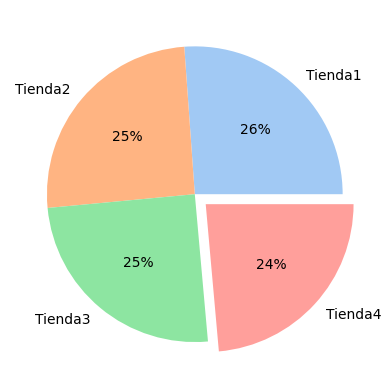

In [9]:
import matplotlib.pyplot as plt
import seaborn

data = df_facturacion_por_tienda['Ingreso Total']
keys = df_facturacion_por_tienda['Tienda']

explode = [0, 0, 0, 0.1]
palette_color = seaborn.color_palette('pastel')

plt.pie(data, labels=keys, colors=palette_color,
		explode=explode, autopct='%.0f%%')

plt.show()



In [10]:
import plotly.express as px

df = pd.DataFrame(ventas_merged)

# Convertimos a formato largo (long-form)
df_melted = df.melt(id_vars='Categor√≠a del Producto', var_name='Tienda', value_name='Cantidad')

# Gr√°fico interactivo
fig = px.bar(df_melted,
             x='Cantidad',
             y='Categor√≠a del Producto',
             color='Tienda',
             barmode='group',
             orientation='h',
             title='Cantidad Vendida por Tienda y Categor√≠a de Producto')

fig.update_layout(yaxis_title="Categor√≠a del Producto", xaxis_title="Cantidad Vendida")
fig.show()

In [11]:
top_data = []

for columna in productos_merged.columns[1:]:
    ctienda = columna.replace("Cantidad Vendida ", "")
    datos = productos_merged[['Producto', columna]].copy()

    top_mas = datos.nlargest(5, columna).copy()
    top_mas['Tipo'] = 'M√°s vendidos'
    top_mas['Tienda'] = ctienda
    top_mas = top_mas.rename(columns={columna: 'Cantidad'})

    top_menos = datos.nsmallest(5, columna).copy()
    top_menos['Tipo'] = 'Menos vendidos'
    top_menos['Tienda'] = ctienda
    top_menos = top_menos.rename(columns={columna: 'Cantidad'})

    top_data.append(pd.concat([top_mas, top_menos]))

df_top = pd.concat(top_data, ignore_index=True)

fig = px.scatter(
    df_top,
    x="Tienda",
    y="Producto",
    color="Tipo",
    size="Cantidad",
    hover_name="Producto",
    title="Top 5 M√°s y Menos Vendidos por Tienda - Dispersi√≥n con Tama√±o",
    size_max=30
)

fig.update_layout(
    yaxis={'categoryorder':'total descending'},
    height=800
)

fig.show()




In [12]:
fig = px.line(df_costo_envio_por_tienda,
              x="Tienda",
              y="Calificacion Promedio",
              markers=True,
              title="Tendencia del Costo de Env√≠o Promedio por Tienda")

fig.update_traces(line_color='MediumPurple')
fig.update_layout(yaxis_title="Costo Promedio de Env√≠o")
fig.show()


# üìä An√°lisis de Rendimiento - Alura Store

Durante este desaf√≠o, ayudamos al Sr. Juan a decidir qu√© tienda de su cadena **Alura Store** debe vender para iniciar un nuevo emprendimiento. Para ello, analizamos datos de ventas, rendimiento, calificaciones, y costos de env√≠o de las 4 tiendas. El objetivo fue identificar la tienda **menos eficiente** y presentar una recomendaci√≥n final basada en datos.

---

## 1. üí∞ Facturaci√≥n Total por Tienda

| Tienda  | Ingreso Total     |
|---------|-------------------|
| Tienda1 | 1,150,880,000     |
| Tienda2 | 1,116,344,000     |
| Tienda3 | 1,098,020,000     |
| Tienda4 | **1,038,376,000** |

üîª **Tienda4** presenta el ingreso total m√°s bajo entre las 4.

---

## 2. üß∫ Ventas por Categor√≠a de Producto

| Categor√≠a del Producto       | CV_Tienda1 | CV_Tienda2 | CV_Tienda3 | CV_Tienda4 |
|-----------------------------|------------|------------|------------|------------|
| Art√≠culos para el hogar     | 171        | 181        | 177        | 201        |
| Deportes y diversi√≥n        | 284        | 275        | 277        | 277        |
| Electrodom√©sticos           | 312        | 305        | 278        | 254        |
| Electr√≥nicos                | 448        | 422        | 451        | 451        |
| Instrumentos musicales      | 182        | 224        | 177        | **170**    |
| Juguetes                    | 324        | 313        | 315        | 338        |
| Libros                      | 173        | 197        | 185        | 187        |
| Muebles                     | **465**    | 442        | 499        | 480        |

üìå Observaciones:
- La categor√≠a **"Muebles"** lidera las ventas en todas las tiendas.
- **"Instrumentos musicales"** es la categor√≠a menos vendida en **Tienda4**.
- Tienda4 mantiene buen rendimiento en "Muebles", "Juguetes" y "Electr√≥nicos".

---

## 3. üåü Calificaci√≥n Promedio

| Tienda  | Calificaci√≥n Promedio |
|---------|------------------------|
| Tienda1 | 4.035                  |
| Tienda2 | 4.032                  |
| Tienda3 | 4.029                  |
| Tienda4 | **4.042**              |

üìà **Tienda4** tiene la **mejor calificaci√≥n promedio** de todas las tiendas.

---

## 4. üì¶ Costo Promedio de Env√≠o

| Tienda  | Costo de Env√≠o Promedio |
|---------|--------------------------|
| Tienda1 | 20.37                    |
| Tienda2 | 20.40                    |
| Tienda3 | 20.35                    |
| Tienda4 | **20.33**                |

‚úÖ **Tienda4** tiene el **menor costo promedio de env√≠o**, lo cual sugiere eficiencia log√≠stica.

---

## 5. üõçÔ∏è Productos m√°s y menos vendidos

(Resumen general por tienda)

| Tienda  | M√°s vendido              | Menos vendido              |
|---------|--------------------------|-----------------------------|
| Tienda1 | Muebles                  | Art√≠culos para el hogar     |
| Tienda2 | Muebles                  | Art√≠culos para el hogar     |
| Tienda3 | Muebles                  | Instrumentos musicales      |
| Tienda4 | Muebles                  | Instrumentos musicales      |

---

## ‚úÖ Conclusi√≥n y Recomendaci√≥n Final

Aunque **Tienda4** tiene el menor ingreso total, tambi√©n:

- Presenta **la mejor calificaci√≥n por parte de los clientes**.
- Tiene **el costo de env√≠o m√°s bajo**.
- Mantiene **altas ventas en categor√≠as clave** como *Muebles*, *Juguetes* y *Electr√≥nicos*.

üìå Esto indica que **la Tienda4 es eficiente y con buena reputaci√≥n**, pero puede estar limitada por ubicaci√≥n, tama√±o u oferta.

> üí° **Recomendaci√≥n Final:** El Sr. Juan deber√≠a **vender la Tienda4**, capitalizando su buen rendimiento operativo y reputaci√≥n, y comenzar su nuevo emprendimiento con esos recursos.

---


In [14]:
import seaborn as sns
import folium
from folium.plugins import HeatMap


# A√±adir columna para identificar la tienda
tienda["Tienda"] = "Tienda1"
tienda2["Tienda"] = "Tienda2"
tienda3["Tienda"] = "Tienda3"
tienda4["Tienda"] = "Tienda4"

# Unir todas las tiendas
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


# üó∫Ô∏è An√°lisis del Desempe√±o Geogr√°fico

## üéØ Objetivo
Explorar los datos de ventas de las tiendas utilizando **coordenadas geogr√°ficas** (latitud y longitud) para identificar patrones regionales de compra, concentraciones de ventas y desempe√±o por ubicaci√≥n.



In [24]:
m = folium.Map(location=[4.5709, -74.2973], zoom_start=5)
heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)

m

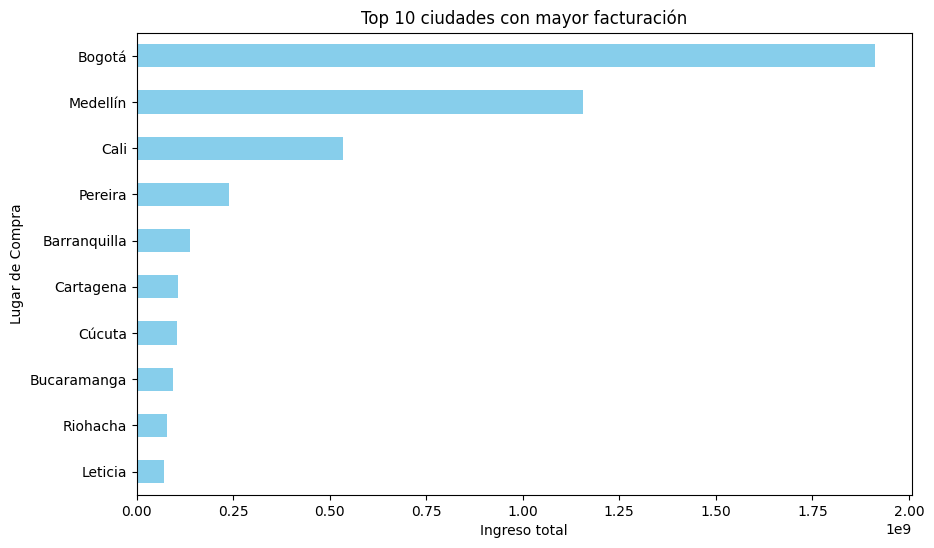

In [17]:
df["Ingreso"] = df["Precio"] + df["Costo de env√≠o"]
ingresos_ciudad = df.groupby("Lugar de Compra")["Ingreso"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ingresos_ciudad.head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 ciudades con mayor facturaci√≥n")
plt.xlabel("Ingreso total")
plt.gca().invert_yaxis()
plt.show()


## Conclusiones
* Las ciudades con mayor concentraci√≥n de ventas son Bogot√°, Medell√≠n, y Cali.

* El ingreso total se concentra principalmente en grandes ciudades, como Bogot√° y Medell√≠n.